In [1]:
import keras

In [2]:
dir(keras)

['Input',
 'Model',
 'RandomRotation',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'engine',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'utils',
 'wrappers']

In [2]:
from keras.datasets import mnist # 从keras中导入mnist数据集
from keras.models import Sequential # 导入序贯模型
from keras.layers import Dense # 导入全连接层
from keras.optimizers import SGD # 导入优化函数

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # 下载mnist数据集
print(x_train.shape,y_train.shape) # 60000张28*28的单通道灰度图
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


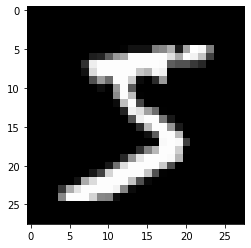

In [4]:
import matplotlib.pyplot as plt # 导入可视化的包
im = plt.imshow(x_train[0],cmap='gray')
plt.show()

In [5]:
y_train[0]

5

In [4]:
x_train = x_train.reshape(60000,784) # 将图片摊平，变成向量
x_test = x_test.reshape(10000,784) # 对测试集进行同样的处理
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [5]:
x_train = x_train / 255
x_test = x_test / 255
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [7]:
from keras.layers.core import Flatten,Dropout

In [8]:
model = Sequential() # 构建一个空的序贯模型
# 添加神经网络层
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(256,activation='relu'))
# 加入dropout层，防止过拟合
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train,batch_size=64,epochs=5,validation_data=(x_test,y_test)) # 直接将测试集用作验证集

Epoch 1/5
938/938 [==============================] - 3s 4ms/step - loss: 0.8813 - accuracy: 0.7490 - val_loss: 0.3884 - val_accuracy: 0.8953
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4232 - accuracy: 0.8788 - val_loss: 0.2980 - val_accuracy: 0.9162
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3451 - accuracy: 0.8997 - val_loss: 0.2593 - val_accuracy: 0.9244
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3013 - accuracy: 0.9134 - val_loss: 0.2320 - val_accuracy: 0.9335
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.2727 - accuracy: 0.9211 - val_loss: 0.2108 - val_accuracy: 0.9398


In [16]:
score = model.evaluate(x_test,y_test)
# 保存模型
model.save('mnist_model.h5')  # creates a HDF5 file 'my_model.h5'
print("loss:",score[0])
print("accu:",score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2108 - accuracy: 0.9398
loss: 0.21077744662761688
accu: 0.9398000240325928


In [24]:
from keras.models import load_model,Model
layer_model = Model(inputs=model.input, outputs=model.layers[4].output)
feature=layer_model.predict(x_test[1].reshape(1,784))
typ=model.predict_classes(x_test[1].reshape(1,784))
print(feature)
print(typ)

[[2.71537807e-03 4.60730225e-04 9.69340861e-01 9.51941963e-03
  1.75056675e-06 4.71136486e-03 1.13870185e-02 6.00163230e-06
  1.85584708e-03 1.78185178e-06]]
[2]
